In [ ]:
# KMeans, sklearn.metrics.silhouette_score, sklearn.metrics.cluster.adjusted_mutual_info_score
# https://scikit-learn.org/stable/modules/classes.html#clustering-metrics

## Домашнее задание 

### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика силуэтта? Стало лучше или хуже? Какое количество кластеров лучше, два или четыре?

In [1]:
# -- ВАШ КОД ТУТ --

import pickle
import numpy as np
from sklearn.cluster import KMeans

with open('data/clustering-.pkl', 'rb') as f:
    data_clustering = pickle.load(f)

X = np.array(data_clustering['X'])
Y = np.array(data_clustering['Y'])

In [2]:
from sklearn.metrics import silhouette_score

model2 = KMeans(n_clusters=2, random_state=1).fit(X)
model3 = KMeans(n_clusters=3, random_state=1).fit(X)
model4 = KMeans(n_clusters=4, random_state=1).fit(X)
print('Для количества кластеров k = 2 метрика Силуэтта = %s' %silhouette_score(X, model2.labels_))
print('Для количества кластеров k = 3 метрика Силуэтта = %s' %silhouette_score(X, model3.labels_))
print('Для количества кластеров k = 4 метрика Силуэтта = %s' %silhouette_score(X, model4.labels_))

Для количества кластеров k = 2 метрика Силуэтта = 0.4465356047465253
Для количества кластеров k = 3 метрика Силуэтта = 0.4523966375832621
Для количества кластеров k = 4 метрика Силуэтта = 0.4417501080615704


#### Метрика силуэтта лучшая при k=3, худшая при k = 4

### Задание начального уровня

Обучите *k-means* для количества кластеров $k=4$ на датасете `data/clustering.pkl`. Как изменилась метрика *AMI*? Стало лучше или хуже? Какое количество кластеров лучше мо метрике AMI?

In [3]:
# -- ВАШ КОД ТУТ --

from sklearn.metrics.cluster import adjusted_mutual_info_score

model2 = KMeans(n_clusters=2, random_state=2).fit(X)
model3 = KMeans(n_clusters=3, random_state=2).fit(X)
model4 = KMeans(n_clusters=4, random_state=2).fit(X)
print('Для количества кластеров k = 2 метрика AMI = %s' %adjusted_mutual_info_score(Y, model2.labels_, average_method='arithmetic'))
print('Для количества кластеров k = 3 метрика AMI = %s' %adjusted_mutual_info_score(Y, model3.labels_, average_method='arithmetic'))
print('Для количества кластеров k = 4 метрика AMI = %s' %adjusted_mutual_info_score(Y, model4.labels_, average_method='arithmetic'))

Для количества кластеров k = 2 метрика AMI = 0.9286022516535728
Для количества кластеров k = 3 метрика AMI = 0.6138984071108896
Для количества кластеров k = 4 метрика AMI = 0.5827727212133398


#### Лучшая метрика AMI для k=2

### Задание высокого уровня

Загрузите датасет `clustering_hw.csv` из приложенной директории `data` и визуализируйте данные. Должно получится как-то так:

![clustering_hw](https://248006.selcdn.ru/public/DS.%20Block%202.%20M7/clustering_hw.png)

В рамках домашней работы

1. вычислите оптимальное количество кластеров $k$
1. обучите k-means с количеством кластеров  $k$
1. к какому кластеру принадлежит точка $x=(5, 8)$? к какому кластеру принадлежит точка $x=(0, 5)$? Они принадлежат к разным кластерам или одному?
1. Каково качество кластеризации по AMI

In [4]:
# -- ВАШ КОД ТУТ --

from numpy import genfromtxt
file = genfromtxt('data/clustering_hw.csv', delimiter=',')
    
X_hw = file[1:,0:2]
Y_hw = file[1:,2]

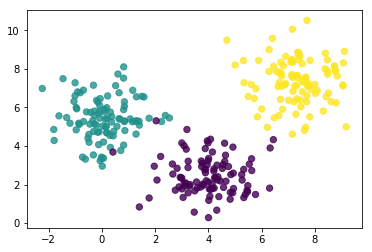

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(X_hw[:, 0], X_hw[:, 1], s=40, c=Y_hw, marker='o', alpha=0.8)
plt.show()

In [6]:
for i in range(2,10):
    model = KMeans(n_clusters=i, random_state=3).fit(X_hw)
    print('Для количества кластеров k = %d метрика AMI = %s' %(i ,adjusted_mutual_info_score(Y_hw, model.labels_, average_method='arithmetic')))

Для количества кластеров k = 2 метрика AMI = 0.698235661135204
Для количества кластеров k = 3 метрика AMI = 0.970007495368386
Для количества кластеров k = 4 метрика AMI = 0.8611140591836342
Для количества кластеров k = 5 метрика AMI = 0.7899094482403152
Для количества кластеров k = 6 метрика AMI = 0.7288103682284953
Для количества кластеров k = 7 метрика AMI = 0.6867939722644045
Для количества кластеров k = 8 метрика AMI = 0.6582257512685893
Для количества кластеров k = 9 метрика AMI = 0.6302487970607537


In [7]:
# Максимум AMI достигается при разбитии выборки на 3 кластера

In [11]:
model = KMeans(n_clusters=3, random_state=40).fit(X_hw)
model.predict([[5,8], [0,5]])

array([1, 2])

In [9]:
# Точка (5,8) принадлежит к кластеру 1, а точка (0,5) принадлежит к кластеру 2. Т.е. точки в разных кластерах.

### Заключение

Мы познакомились с двумя метриками

* Silhouette. Её используем, когда есть только сами объекты, а метки кластеров отсутствуют в обучающей выборке
* AMI. Её используем, когда известны "истинные" метки кластеров

Метрик намного больше - о них можно почитать [ в документации sklearn](https://scikit-learn.org/stable/modules/classes.html#clustering-metrics)